In [1]:
import tensorflow as tf

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [5]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [6]:
class_names = [0,1,2,3,4,5,6,7,8,9]

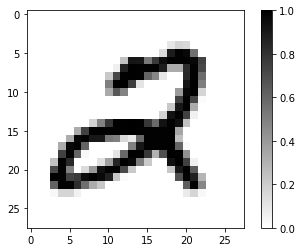

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

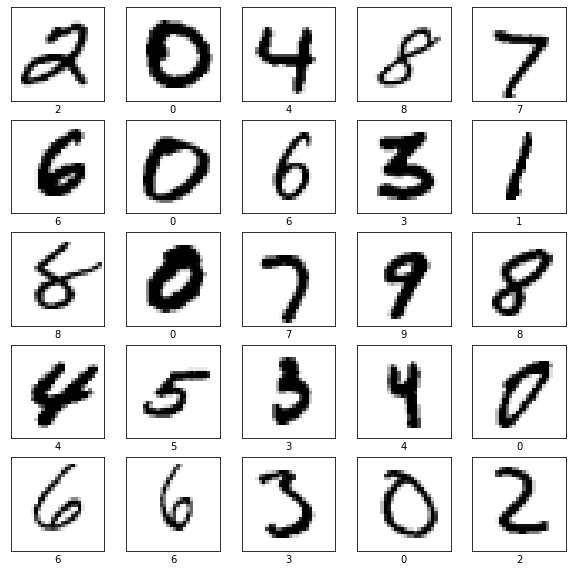

In [8]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),

    tf.keras.layers.Conv2D(10, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 10)          1510      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 120)               1

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
history = model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2281 - accuracy: 0.9304
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0783 - accuracy: 0.9750
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0560 - accuracy: 0.9827
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0234 - accuracy: 0.9924
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.018

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9856
Accuracy on test dataset: 0.9855999946594238


In [15]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 78ms/step


In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0]

array([-22.46305  , -13.094567 ,  34.052197 , -11.315147 ,  -4.1143746,
       -19.87344  ,  -7.4357033,  -7.700846 ,  -2.4264266, -11.56832  ],
      dtype=float32)

In [18]:
np.argmax(predictions[0])

2

In [19]:
test_labels[0]

2